# Objectives
1. Classification
    - ML with scikit-learn
    - The classification
    - Measuring model performances
2. Regression
    - Regression model 
    - The basic for linear regression model 
    - Cross-validation
    - Regularized regression: 
     - Ridge 
     - Lasso 
3. Fine-Tuning Your Model
    - Classification metrics for goodness of a fit
    - Logistic regression and ROC kurve
    - Hyperparameter tuning to optimize the model
     - GridSearchCV
     - RandomizedSearchCV
4. Preprocessing and Pipelines
    - Preprocessing data: dummy variables
    - Handling missing values: data imputation
    - Centering and scaling 
    - Evaluating multiple models

## 1. Classification
- ML with scikit-learn
- The classification
- Measuring model performances

### 1.1 Machine learning with scikit-learn
- **Machine learning**
 -Computers are given the ability to learn to make decisions from data
 - without being explicitly programmed! 
- **Unsupervised learning**
 - Uncovering hidden patterns from unlabeled data 
 > 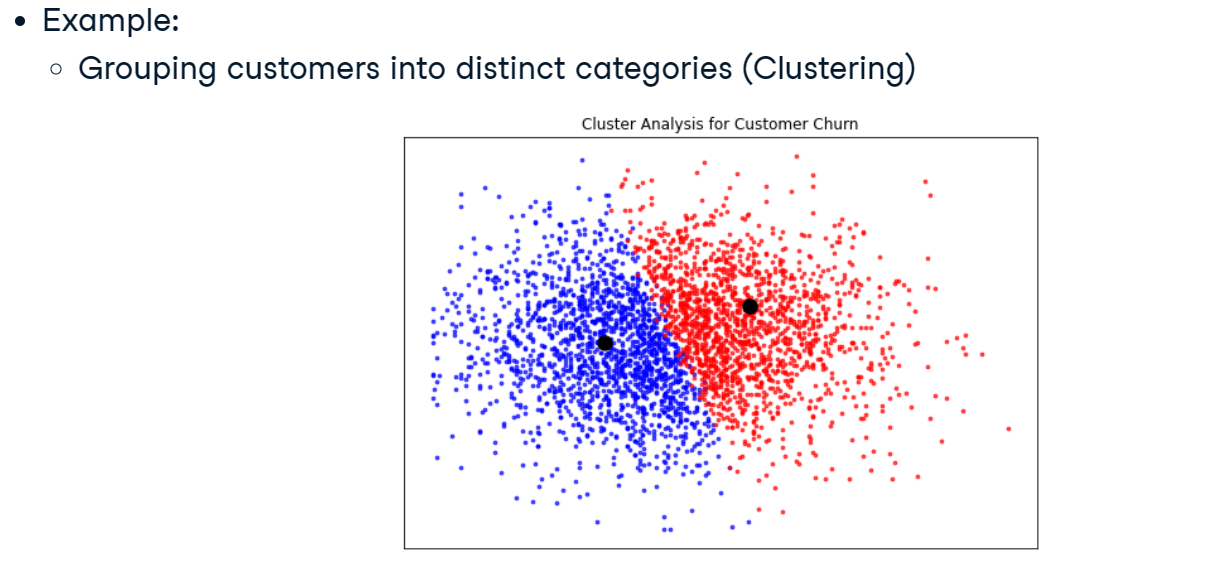
 
- **Supervised learning**
 - The predicted values are known
 - Aim: predict the target values of unseen data, given the features
 > 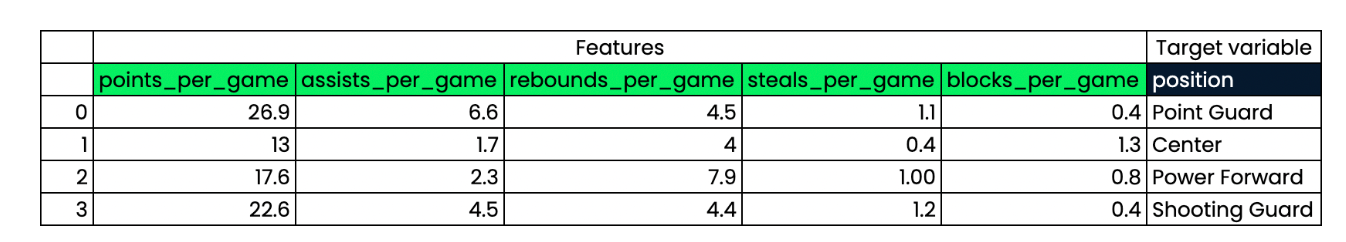
 
- Types of supervised learning#
 - **Classification**: Target variable consists of categories
  - binary classfication: to determine if the bank transaction fraudulent
 - **Regression**: to predict continuous values
 
- Naming conventions: 
 - Features = predictor variable = independent variable
 - Target variable = dependent variable = response variable

- Requirements before supervised learning: perform Exploartory data analysis (EDA)
 - No missing values 
 - Data in numeric format 
 - Data stored in pandas DataFrame or NumPy array

- **scikit-learn** 

In [ ]:
# scikit-learn syntax example 
from sklearn.module import Model

# create variable named model 
model = Model()
# fit the model 
model.fit(X, y)
# call predictions on the model 
predictions = model.redict(X_new)
print(perdictions)

In [ ]:
output: 
    array([0, 0, 0, 0, 1, 0])
# return 1 is the spam email 

### 1.2 The classification challenge
*Classifying labels of unseen data(training data)*
- Build a model
- Model learns from the labeled data we pass it
- Pass unlabeled data to the model as input
- Model predicts the labels of the unseen data

**k-Nearest Neighbors(KNN)**: Predict the label of a data point by 
- Looking at the **k** closest labeled data points
- Taking a majority vote
> 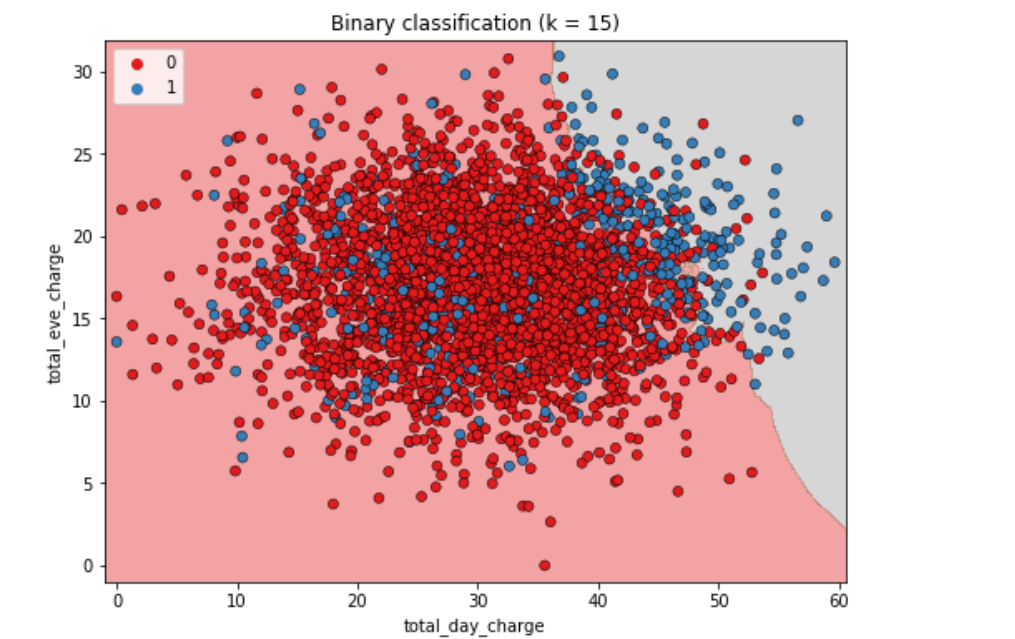

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
path='/QXJ/kaggle/data/telecom_churn.csv'
telecom = pd.read_csv(path)
telecom.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [12]:
telecom.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [13]:
telecom.isna().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [17]:
telecom['International plan'].replace({
    'No':0, 'Yes':1
})

0       0
1       0
2       0
3       1
4       1
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Name: International plan, Length: 2666, dtype: int64

In [27]:
telecom['Voice mail plan'].replace({
    'No':0, 'Yes':1
})

0       1
1       1
2       0
3       0
4       0
       ..
2661    0
2662    1
2663    0
2664    0
2665    1
Name: Voice mail plan, Length: 2666, dtype: int64

In [100]:
from sklearn.neighbors import KNeighborsClassifier
# convert series to numpy 
X = telecom[['Total day charge', 'Total eve charge']].to_numpy()
y = telecom['Churn'].to_numpy()
print(X.shape, y.shape)

(2666, 2) (2666,)


In [26]:
knn = KNeighborsClassifier(n_neighbors = 15).fit(X,y)

In [28]:
# new_observations
X_new = np.array([[56.8, 17.5],
                 [24.4, 24.1],
                 [50.1, 10.9]])
print(X_new.shape)
# 3 observations, 2 features

(3, 2)


In [29]:
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))
# churn, no, no 

Predictions: [ True False False]


### 1.3 Measuring model performance
- **Accuracy**: correct predictions / total observations
 - we need test set to measure accuracy: train_test_split()
 - use knn.score(X_test, y_test)
- Model complexity 
 - Larger k = less complex model = can cause underfitting
 - Smaller k = more complex model = can lead to overfitting (sensitive to noisy) 
- Using incremental k values 
 > *As k increase, the boundary is less effected by the increased observations*
 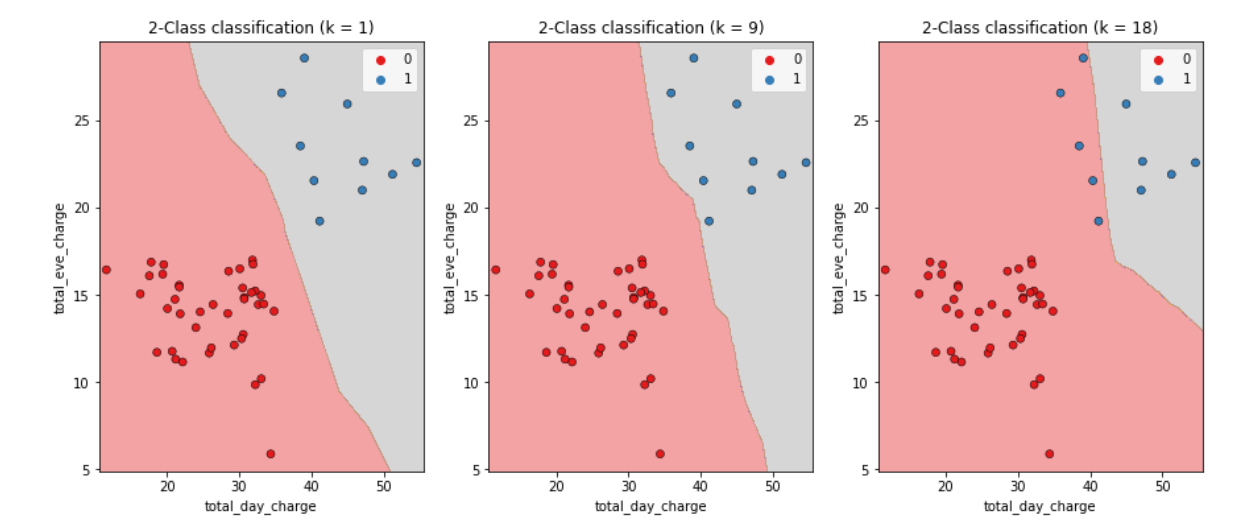

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                  random_state = 20, 
# stratify = y: to ensure our split reflects the proportion of label in out data 
                                                  stratify = y)
# ensuring the target label proportions reflect that of the original dataset.
knn = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)
print(knn.score(X_test,y_test))

0.87875


In [31]:
# create incremental k-values
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)

# create for loop to set n to different values 
for n in neighbors: 
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    train_accuracies[n] = knn.score(X_train,y_train)
    test_accuracies[n] = knn.score(X_test,y_test)

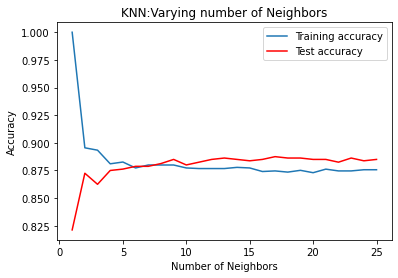

In [47]:
fig,ax = plt.subplots()
ax.plot(train_accuracies.keys(), train_accuracies.values(), label = 'Training accuracy')
ax.plot(test_accuracies.keys(), test_accuracies.values(), color = 'red', label = 'Test accuracy')
ax.legend()
plt.title('KNN:Varying number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [48]:
telecom.to_csv('/QXJ/kaggle/data/telcom.csv')

## 2. Regression
- Regression model 
- The basic for linear regression model 
- Cross-validation
- Regularized regression: Ridge and Lasso 

### 2.1 Introduction to regression
- the target variable has **continuous values**
- the X-array must be **2-dimention**

In [195]:
diab = pd.read_csv('/QXJ/kaggle/data/diabetes.csv')
diab.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [57]:
diab.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [119]:
# create feature and target arrays
X = diab.drop('Glucose',axis=1).to_numpy()
y = diab['Glucose'].to_numpy()
print(type(X),print(type(y)))
print(X.shape, y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'> None
(768, 8) (768,)


In [60]:
# use bmi to predict glucose
x_bmi = x[:,5]
print(y.shape, x_bmi.shape)
# x - features must be in two-dimentional array to use scikit-learning 

(768,) (768,)


In [62]:
# reshape x from 1- to 2- dimention
x_bmi = x_bmi.reshape(768,1)
print(x_bmi.shape)

(768, 1)


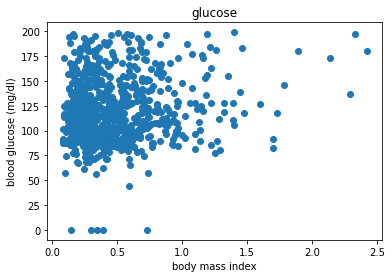

In [64]:
# plotting bmi vs. glucose
plt.scatter(x_bmi, y)
plt.title('glucose')
plt.xlabel('body mass index')
plt.ylabel('blood glucose (mg/dl)')
plt.show()

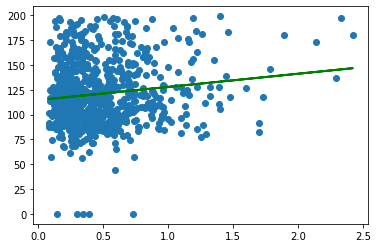

In [71]:
# fitting a regression model 
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_bmi,y)
predictions = reg.predict(x_bmi)
plt.scatter(x_bmi,y)
plt.plot(x_bmi,predictions, color = 'green', linewidth=2)

### 2.2 The basics of linear regression
- Simple linear regresion: y = ax + b (a-slope, b - intercept)
- Multiple linear regression y = a1x1 + a2x2 + b
- Choose the line that minimizes the error function
 - Error functin = loss function = cost function (-> ols model as default)
  >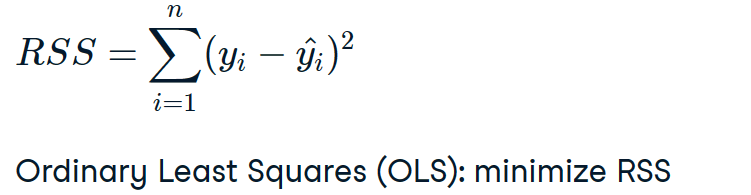
- Metric
 - R-squared: quantified the variance in target values explained by the feature 
 - MSE (mean squared error): measured in target units, squared, such as dollars squared 
 - RMSE (root mean squared error) : np.sqrt(MSE), such as dollors sqaured to dollars
 > 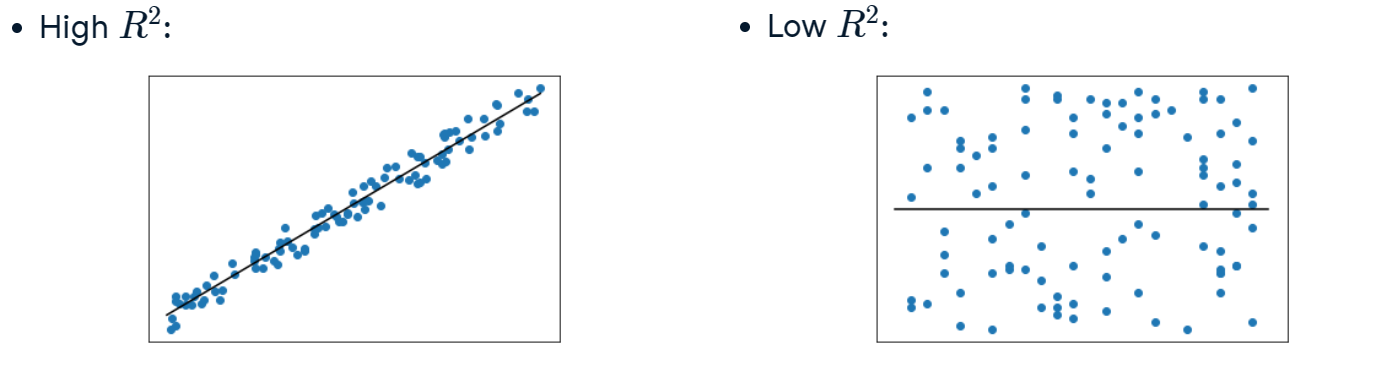

In [79]:
# Linear regression using all features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,
                                                   random_state = 42)
reg_all = LinearRegression().fit(X_train, y_train)
predictions = reg_all.predict(X_test)
print(predictions[:5])

[119.91303675  95.70325357 104.63962314 114.05040231 118.58321727]


In [80]:
# R-squared 
reg_all.score(X_test, y_test)

0.28280468810375137

In [82]:
# RMSE 
from sklearn.metrics import mean_squared_error
RMSE = mean_squared_error(y_test, predictions, squared = False)
RMSE

26.34145958223226

### 2.3 Cross-validation
- Model performance is dependent on the way we split up the data
- Not representative of the model's ability to generate unseen data
- Solution: cross validation!!! (5 folds = 5-fold CV)
 - split the dataset into 5 groups or folders
 - set aside the 1st fold as the test set
 - fit our model on the remaining 4 folds and predict our test set#
 - compute the metric of interest, such as R-squared
 - set aside the 2rd fold as the test set, fit on the remaining data, predict on the test set, and compute the metric of interest 
 ......
 - compute statistics of interest such as mean, median and 95 % CI on the collected R-squared
- More folds, more computationally expensive
>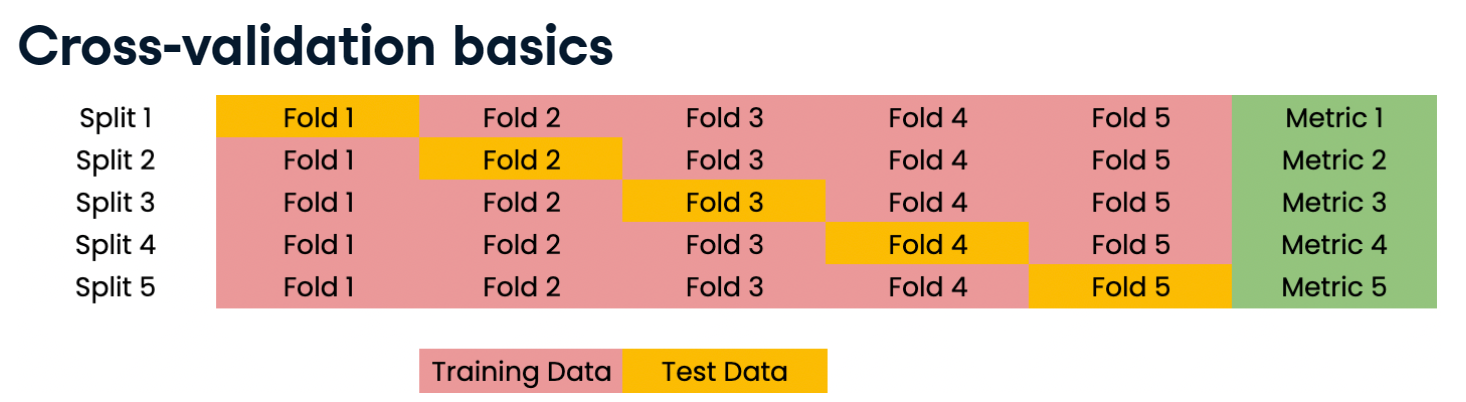

In [86]:
# cross-validation 
from sklearn.model_selection import cross_val_score, KFold
# default n=5
kf = KFold(n_splits = 6, shuffle = True, random_state = 42 )
reg = LinearRegression()
# keyword cs speifies the folds
cv_results = cross_val_score(reg, X, y, cv = kf)
print(cv_results)
# return R-squred

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]


In [87]:
print(np.mean(cv_results), np.median(cv_results))

0.3190969786734479 0.2931352260195322


In [89]:
# 95% confidence interval 
print(np.quantile(cv_results,[0.025,0.975]))

[0.24088592 0.41580685]


### 2.4 Regularized regression
- Reqularization: a technique to avoid overfitting by penalizing large coefficients, becasue large coefficients can lead to overfitting 
 - **Redige regression**: 
 > 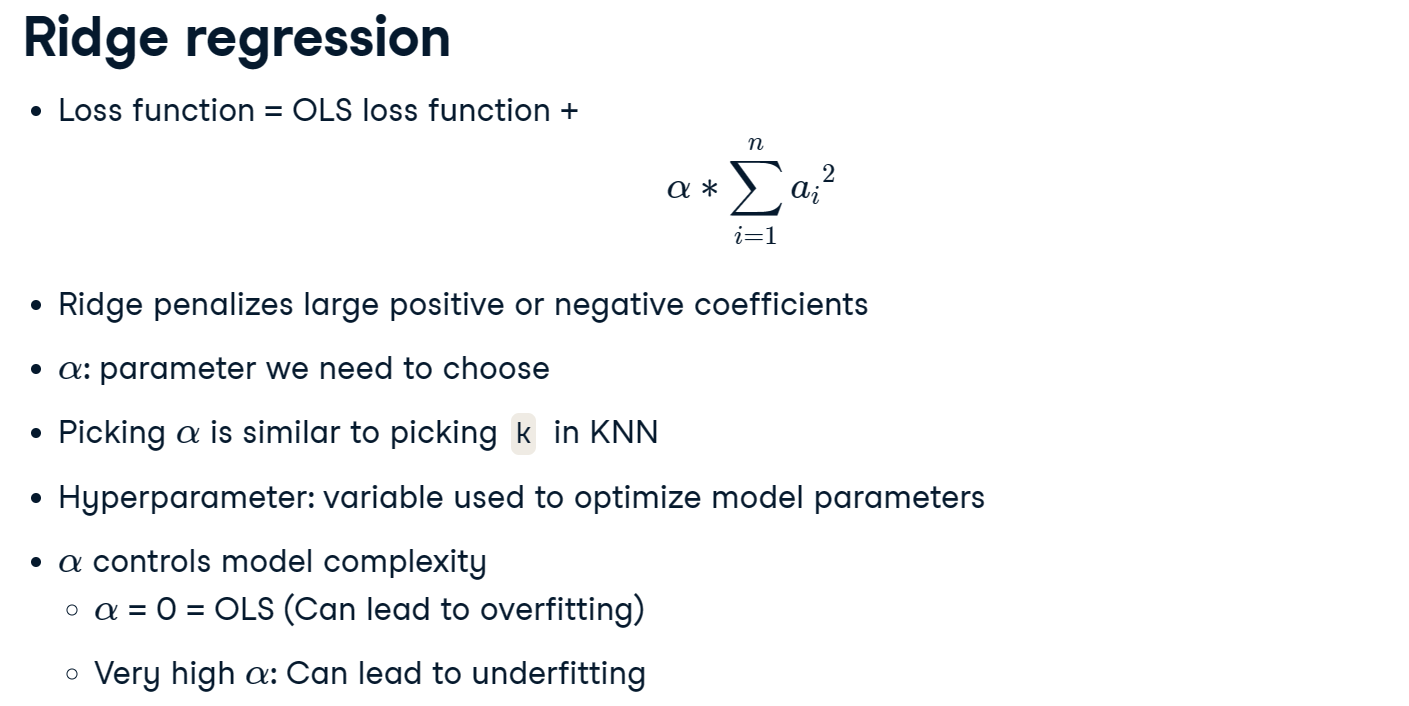
 - **Lasso regression**
  - Lasso can select important feature of a dataset
  - It tends to shrink the coefficients of less important features to O
  - Feastures aer not shrunk to 0 are selected by Lasso
 > 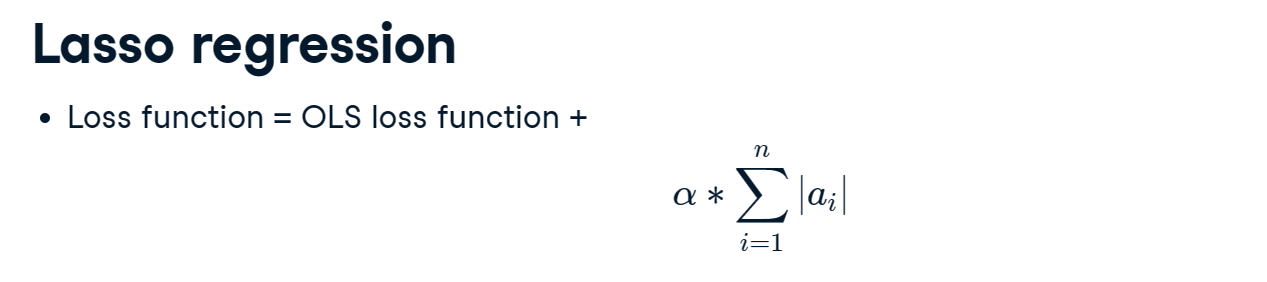

In [91]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha = alpha)
    ridge = ridge.fit(X_test, y_test)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.3439821764498534, 0.34383363693094693, 0.3358308219160846, 0.2659490903376416, 0.20784673282545751]


In [93]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    lasso = Lasso(alpha = alpha)
    lasso = lasso.fit(X_train,y_train)
    y_pred = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.2857532569482625, 0.29795609755827845, 0.17989838789273882, 0.10438614467572016, 0.04044144424693341]


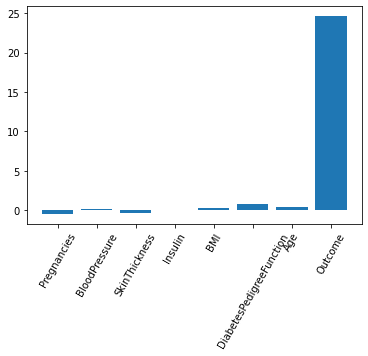

In [99]:
# Use lasso to select the features
names = diab.drop('Glucose',axis = 1).columns
lasso = Lasso(alpha = 0.1)
lasso_coef = lasso.fit(X,y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation = 60)
plt.show()

## 3. Fine-Tuning Your Model
- Classification metrics for goodness of a fit
- Logistic regression and ROC kurve
- Hyperparameter tuning to optimize the model

### 3.1 How good is your model? 
- Classification metrics
- Measuring model performance with accuracy
 - Fraction of correctly classified samples
 - not always a useful metric 
- Class imbalance: Uneven frequency of classes
 - Need a different way to assess performance: confusion matrix
- Confusion matrix
  > 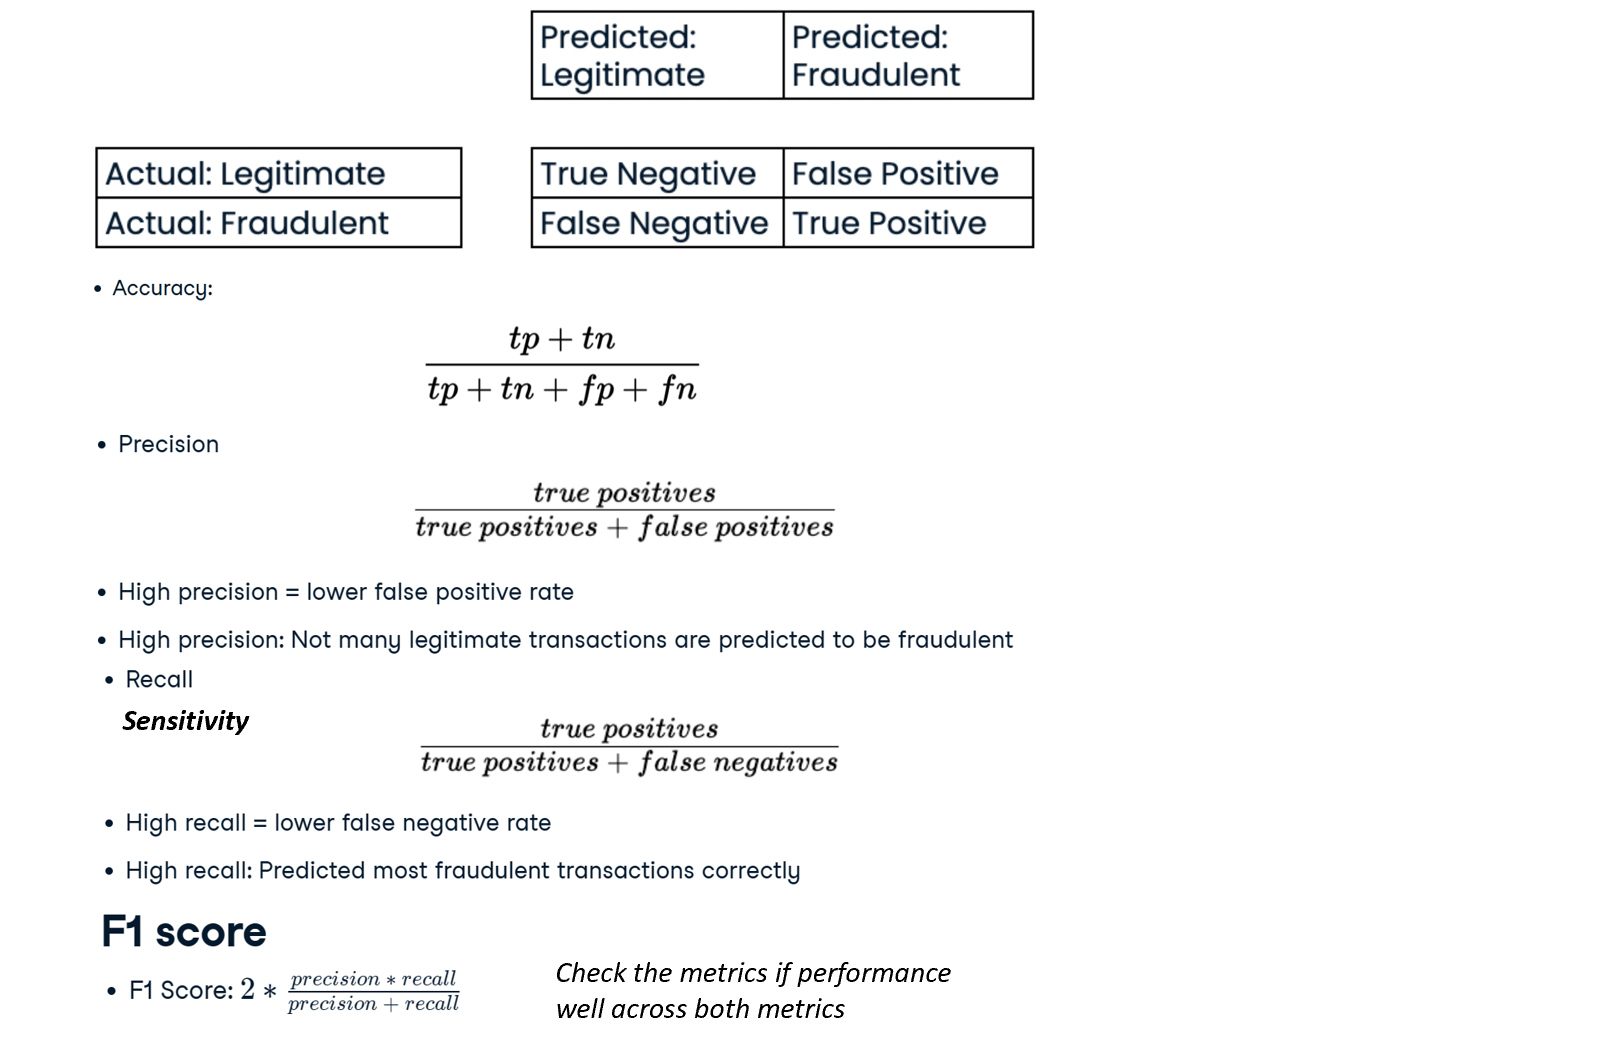

**recall**:
- A model predicting the presence of cancer as the positive class.
- Minimize false negative

**recall** or **F-1**:
- To avoid installing malware, false negatives should be minimized, hence recall or F1-score are better metrics for this model.

**Precision**: 
- A model predicting if a customer is a high-value lead for a sales team with limited capacity.
- With limited capacity, the sales team needs the model to return the highest proportion of true positives compared to all predicted positives, thus minimizing wasted effort.

**Use telecome dataset**

In [105]:
# compute confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 7)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,
                                                    random_state = 42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[890  21]
 [116  40]]


In [106]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.88      0.98      0.93       911
        True       0.66      0.26      0.37       156

    accuracy                           0.87      1067
   macro avg       0.77      0.62      0.65      1067
weighted avg       0.85      0.87      0.85      1067



### 3.2 Logistic regression and the ROC curve
- Logistc regression is used for classification problems
 - LR output probabilities: p
  - if p > 0.5, labeled 1 
 - Probability threshold is 0.5
  - not specific to LR, also to KNN
- **ROC curve**
 - The area under ROC curve, called AUC
 - perfect **AUC*+: p = 1 -> AUC score = 1
 >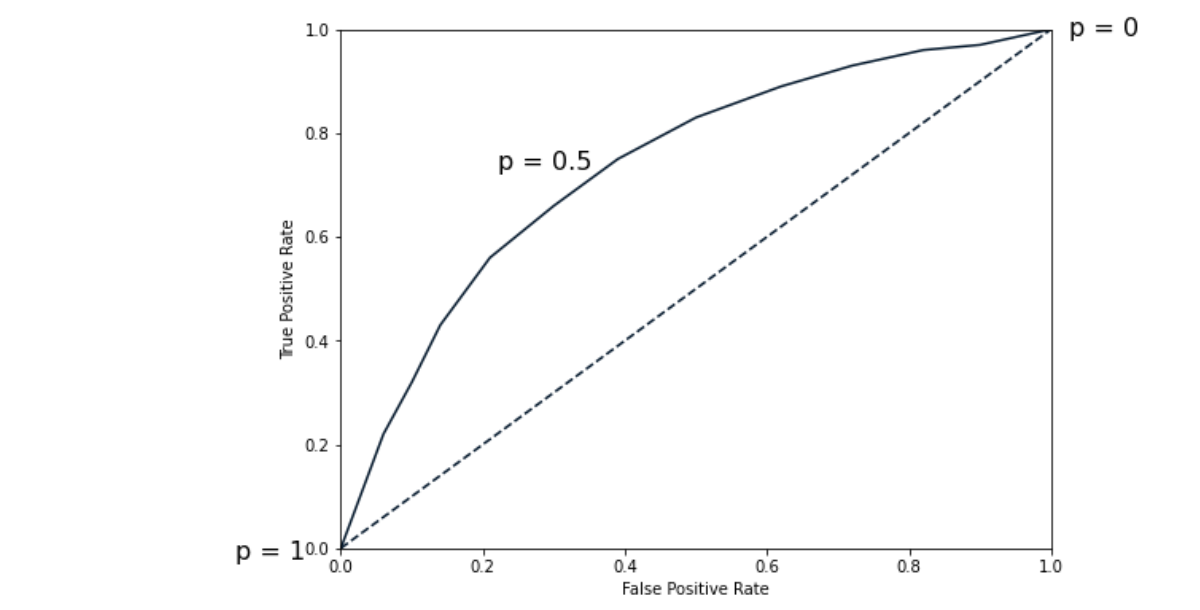

In [108]:
# logistic regession
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,
                                                   random_state = 42)
logreg = LogisticRegression().fit(X_train,y_train)
y_pred = logreg.predict(X_test)
print(y_pred[:5])

[ True False False False False]


In [116]:
# predicting probabilities
# chun and not churn 2D-array
y_pred_probs = logreg.predict_proba(X_test)
# positve probabilities
print(y_pred_probs[:1])
y_pred_probs = y_pred_probs[:,1]
print('not churn probability:', y_pred_probs[:2])
# predict the probability
print(y_pred_probs[0])

[[0.48890684 0.51109316]]
not churn probability: [0.51109316 0.1231076 ]
0.5110931606093109


In [109]:
logreg.predict_proba(X_test)

array([[0.48890684, 0.51109316],
       [0.8768924 , 0.1231076 ],
       [0.91265487, 0.08734513],
       ...,
       [0.83357777, 0.16642223],
       [0.96102359, 0.03897641],
       [0.94704257, 0.05295743]])

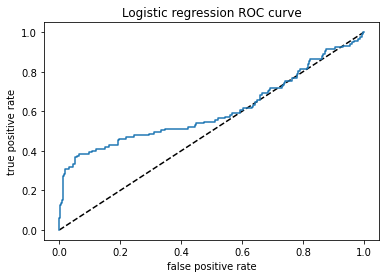

In [117]:
# plot the ROC curve
from sklearn.metrics import roc_curve
# fpr - false positive rate, tpr - true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
# plot from 0 to 1
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Logistic regression ROC curve')
plt.show()
# here p = y_pred_probs = ? (AUC score)

In [118]:
# calculate AUC score
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))
# the model AUC scoreis 0.60, means only 60% better than random guess

0.6045100173943512


### 3.3 Hyperparameter tuning to optimize the model
- Hyperparameters: parameters specified before fitting the model, such as alpha and n_neighbors
 - Ridge/lasso regression: choosing alpha
 - KNN: choosing n_neighbors
- Hyperparmeter tuning: 
 - try different hyperparamters - fit all separately - see performance - choose the best value
 - it is essential to use cross-validation to avoid overfitting to the test set
 - still can split the data and perform cross-validation on the training set
 - withhold the test set for final evaluation
- **GridSearchCV**: a grid possible hyperparameter values to try
 - it does not scale well: No. of fits = No. of -fold cross-validation * No. of hyperparamter * No. of values 
 > 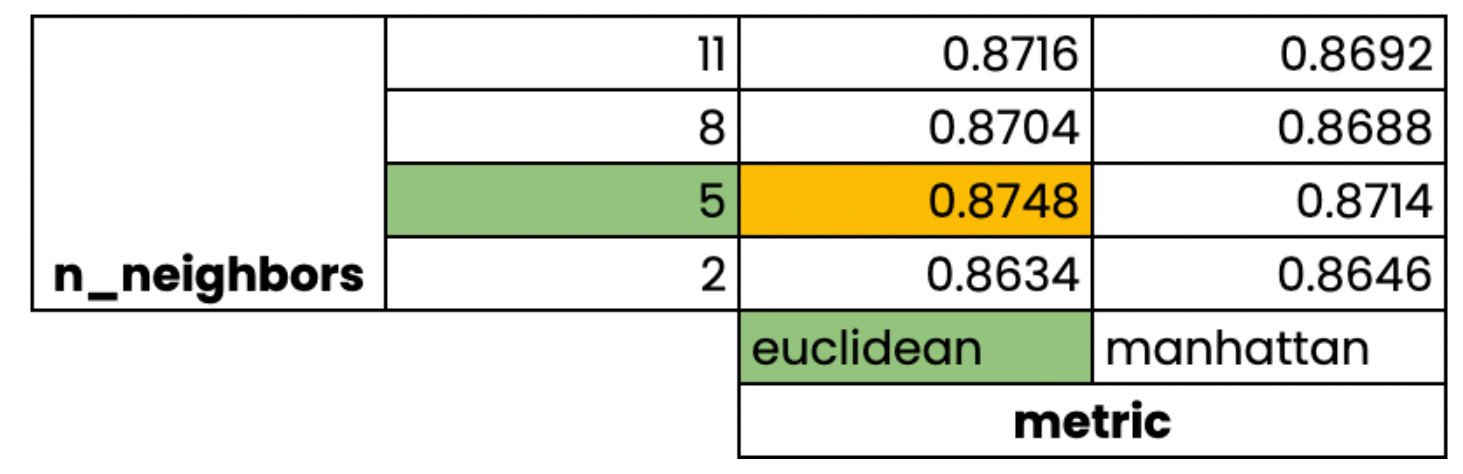
- **RandomizedSearchCV**: pick random hyperparamaters values rather than searching for all possible values

**Diabetes dataset**

In [121]:
# perform GridSearchCV
from sklearn.model_selection import GridSearchCV
kf = KFold(n_splits= 5, shuffle = True, random_state = 42)
# specify the names and values of the hyperparameters
param_grid = {'alpha': np.arange(0.001, 1, 10),
             'solver': ['sag','lsqr']}
# instantiate the model
ridge = Ridge()
# return a GridSearch object to fit the traníning dat
ridge_cv = GridSearchCV(ridge, param_grid, cv = kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)
# retrieve the hyperparameters that perform the best along with the mean corss-validation score over that fold

{'alpha': 0.001, 'solver': 'lsqr'} 0.0472863498560059


In [125]:
# perform RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits= 5, shuffle = True, random_state = 42)
# specify the names and values of the hyperparameters
param_grid = {'alpha': np.arange(0.001, 1, 10),
             'solver': ['sag','lsqr']}
# instantiate the model
ridge = Ridge()

# n_iter represents the number of hyperparamter values tested
# return a GridSearch object to fit the traníning dat
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv = kf, n_iter = 2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)
# 5 folds * 2 n_iter = 10 fits

{'solver': 'sag', 'alpha': 0.001} 0.04729678506742809


In [127]:
# Evaluating on the test set
test_score = ridge_cv.score(X_test,y_test)
test_score

0.026067377423130034

## 4. Preprocessing and Pipelines
- Preprocessing data: dummy variables
- Handling missing values: data imputation
- Centering and scaling 
- Evaluating multiple models

### 4.1 Preprocessing data
- **Numeric data**
- **No missing values**
- **dummy variables**: Convert categorical features to binary features
 - 0: observation was NOT that category 
 - 1: observation was that category
 - pd.get_dummies or sklearn - OneHotEncoder
 >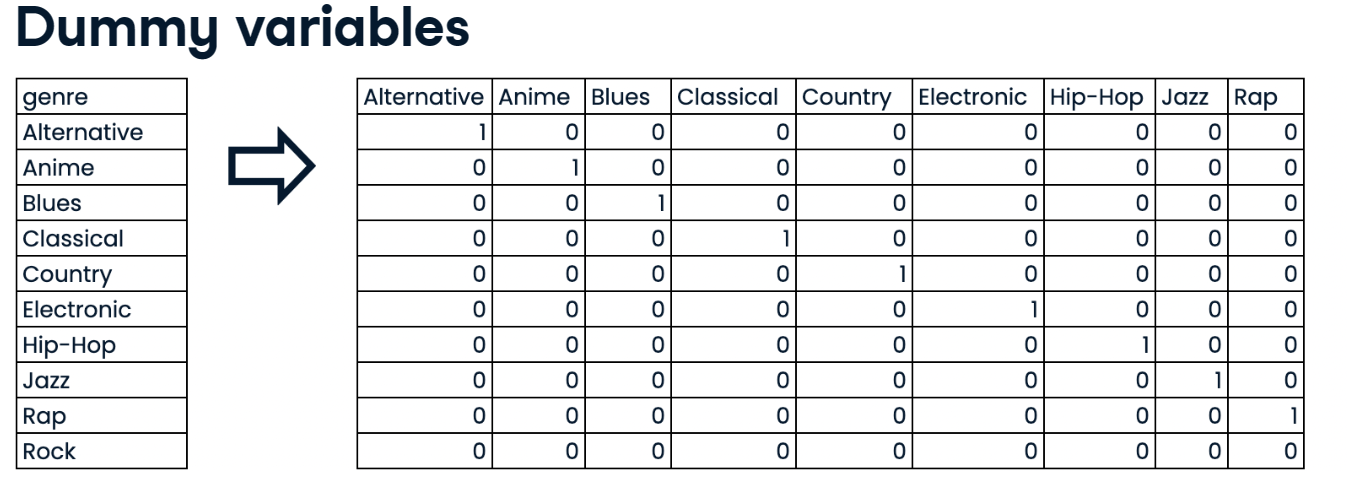

In [172]:
so = pd.read_csv('/QXJ/kaggle/data/so_dev.csv', index_col = 0)
so.head(2)

,Respondent,Hobby,Country,Gender,Age,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,EducationTypes,ConvertedSalary,age_div,YearsCoding_div,new_dev
0,3,1,United Kingdom,0.0,35 - 44 years old,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,"Taught yourself a new language, framework, or ...",70841.0,middle,senior,Full-stack developer
1,8,1,United Kingdom,0.0,18 - 24 years old,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Back-end developer;Database administrator;Fron...,6-8 years,3-5 years,Received on-the-job training in software devel...,41671.0,young,green_hand,Full-stack developer


In [132]:
so['Age'].unique()

array(['35 - 44 years old', '18 - 24 years old', '25 - 34 years old',
       '45 - 54 years old'], dtype=object)

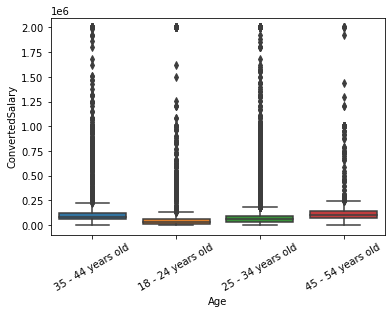

In [135]:
# create dummy variables for 'Age' using pd.get_dummies, and OneHotEncoder
sns.boxplot(data = so, x = 'Age', y = 'ConvertedSalary')
plt.xticks(rotation =30)
plt.show()

In [137]:
# keep n - 1 binary features
so_dummies = pd.get_dummies(so['Age'], drop_first = True)
print(so_dummies.head())

   25 - 34 years old  35 - 44 years old  45 - 54 years old
0                  0                  1                  0
1                  0                  0                  0
2                  0                  0                  0
3                  0                  1                  0
4                  0                  1                  0


In [138]:
# concat the dummy data to the original one
so_dummies = pd.concat([so, so_dummies], axis = 1)
so_dummies.head(3)

,Respondent,Hobby,Country,Gender,Age,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,EducationTypes,ConvertedSalary,age_div,YearsCoding_div,new_dev,25 - 34 years old,35 - 44 years old,45 - 54 years old
0,3,1,United Kingdom,0.0,35 - 44 years old,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,"Taught yourself a new language, framework, or ...",70841.0,middle,senior,Full-stack developer,0,1,0
1,8,1,United Kingdom,0.0,18 - 24 years old,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Back-end developer;Database administrator;Fron...,6-8 years,3-5 years,Received on-the-job training in software devel...,41671.0,young,green_hand,Full-stack developer,0,0,0
2,9,1,United States,0.0,18 - 24 years old,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Back-end developer;Front-end developer;Full-st...,9-11 years,0-2 years,Received on-the-job training in software devel...,120000.0,young,senior,Full-stack developer,0,0,0


In [139]:
so_dummies = so_dummies.drop('Age', axis = 1)
so_dummies.head(1)

,Respondent,Hobby,Country,Gender,FormalEducation,UndergradMajor,DevType,YearsCoding,YearsCodingProf,EducationTypes,ConvertedSalary,age_div,YearsCoding_div,new_dev,25 - 34 years old,35 - 44 years old,45 - 54 years old
0,3,1,United Kingdom,0.0,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,"Taught yourself a new language, framework, or ...",70841.0,middle,senior,Full-stack developer,0,1,0


In [145]:
edu = so[['FormalEducation','ConvertedSalary']]

In [147]:
# if df only has one categorical feature, we can pass the entire df 
# and skip the step of combining variables 
edu_dummies = pd.get_dummies(edu, drop_first = True)
edu_dummies.head(2)
edu_dummies.columns

Index(['ConvertedSalary',
       'FormalEducation_Bachelor’s degree (BA, BS, B.Eng., etc.)',
       'FormalEducation_Master’s degree (MA, MS, M.Eng., MBA, etc.)',
       'FormalEducation_Other doctoral degree (Ph.D, Ed.D., etc.)',
       'FormalEducation_Professional degree (JD, MD, etc.)',
       'FormalEducation_Some college/university study without earning a degree'],
      dtype='object')

In [149]:
X = edu_dummies.drop('ConvertedSalary', axis = 1).to_numpy()
y = edu_dummies['ConvertedSalary'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                   random_state = 42)
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train,
# return the negative MSE, because cross_val_score presume a higher score is better, 
# a negative MSE to countact this 
# we can calculate the training RMSE by taking the square root and converting to positive 
                           cv = kf, scoring = 'neg_mean_squared_error')
print(np.sqrt(-linreg_cv))

[195691.48564586 204657.22300022 190319.8327386  205258.09983003
 199592.07614922]


### 4.2 Handling missing data: data imputation
- No value for a feature in a particular row
- Dropping missing data: na accouts for 5% of all data
 - **df.dropna(subset=col)**
- Imputing values: use subject-matter expertise to replace missing data with educated guesses
 - **must split our data first, to avoid leaking test set information to our model, called as data leakage**
 - **numeric data**
  - common to use the mean 
  - also can use median, or another value
 - **categorical values**, typically use mode
 - **sklearn.impute: SimpleImputer**
  - Imputers are known as transformers

In [ ]:
from sklearn.impute import SimpleImputer

X_cat = so['EducationTypes'].to_numpy().reshape(-1,1)
X_num = so[['Respondent', 'Hobby']].to_numpy()
y = so['ConvertedSalary'].to_numpy()
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat,y,
                                                           test_size = 0.2,
                                                           random_state= 42)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num,y,
                                                           test_size = 0.2,
                                                           random_state= 42)

In [154]:
# To impute missing categorical values 
# instantiate a SimpleImputer, set strategy as most_frquent
imp_cat = SimpleImputer(strategy = 'most_frequent')
# by default, SimpleImputer expect missing values as np.nan
# impute the training categorical features' missing values
X_train_cat = imp_cat.fit_transform(X_train_cat)                                                           
# for the test categorical features, we call .transform
x_test_cat = imp_cat.transform(X_test_cat)

In [159]:
# To impute missing numeric values
# by default, it fills value with the mean
imp_num = SimpleImputer()
# fit and transform the training features
# transform the test feature
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)
X_train = np.append(X_train_num, X_train_cat, axis = 1)
X_test = np.append(X_test_num, X_test_cat, axis = 1)

**Imputing  with a pipeline**
<br>
*an object used to run a series of transformation and build a model in a single workflow*

In [173]:
from sklearn.pipeline import Pipeline
# perform binary classification to predict age
so['YearsCoding_div'] = np.where(so['YearsCoding_div'] == 'green_hand', 1, 0)

In [178]:
so['YearsCoding_div'].unique()

array([0, 1])

In [177]:
X = so['ConvertedSalary'].to_numpy().reshape(-1,1)
y = so['YearsCoding_div'].to_numpy()

In [179]:
# build a pipeline to construct a list of steps 
# containing tuples with the step names specified as strings
# and instantiate the transformer or model
steps = [('imputation', SimpleImputer()),
        ('linear_regression', LinearRegression())]

# we pass this list when instantiating a Pipeline
pipeline = Pipeline(steps)

# split the data, and fit the pipeline to the training data,
# as with any other model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                   random_state = 42)
pipeline.fit(X_train, y_train)
# compute the accuracy
pipeline.score(X_test, y_test)

0.008624007613407647

### 4.3 Centering and scaling
- Many models use some form of distance to inform them
- Features on larger scales can disproportionately influence the model 
 - Normalizing or standardizing (scaling and centering)
- Scale
 - **standardizating: all features are centreed around 0 and have a variance of 1**
  - (val-mean)/variance
  - scikit-learn
 - **val has 0 as min and 1 as max**
  - (val-min)/range
 - **Normalize so the range from -1 to 1.**

In [180]:
diab.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [181]:
diab[['Glucose', 'BloodPressure', 'Insulin']].describe()

,Glucose,BloodPressure,Insulin
count,768.000000,768.000000,768.000000
mean,120.894531,69.105469,79.799479
std,31.972618,19.355807,115.244002
min,0.000000,0.000000,0.000000
25%,99.000000,62.000000,0.000000
50%,117.000000,72.000000,30.500000
75%,140.250000,80.000000,127.250000
max,199.000000,122.000000,846.000000


In [183]:
# standardizating
from sklearn.preprocessing import StandardScaler
X = diab[['BloodPressure', 'Insulin']].to_numpy()
y = diab['Glucose'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                   random_state = 42)
# instantiate a StandardScaler object 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.mean(X), np.std(X)) # before standarizing 
print(np.mean(X_train_scaled), np.std(X_train_scaled)) # after standarizing 

74.45247395833333 82.75030892203382
8.679267944952363e-18 1.0


In [185]:
# scaling in a pipeline
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors = 6))]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                   random_state = 42)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))

0.006493506493506494


In [188]:
# use unscaled to compare
X = diab[['BloodPressure', 'Insulin']].to_numpy()
y = diab['Glucose'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                   random_state = 42)
knn_unscaled = KNeighborsClassifier(n_neighbors = 6).fit(X_train, y_train)
y_pred = knn_unscaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))

0.006493506493506494


In [214]:
X = diab.drop('Glucose', axis = 1).to_numpy()
y = diab['Glucose'].to_numpy()

# CV and scaling in pipeline
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors = 5))]

pipeline = Pipeline(steps)
# specify the hyperparameters: keys are the pipeline step name followed by a double underscore
# followed by the hyperparameter name
# the values is a list or an array
parameters = {'knn__n_neighbors':np.arange(1,20)}

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                   random_state = 42)
# grid search over our parameters
cv = GridSearchCV(pipeline, param_grid = parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_score_)
print(cv.best_params_)

C:\Users\QXJ\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


0.02605624416899907
{'knn__n_neighbors': 18}


In [196]:
X = diab[['BloodPressure', 'Insulin']].to_numpy()
y = diab['Glucose'].to_numpy()

In [201]:
diab.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


### 4.4 Evaluating multiple models
- Different models for different problems
 > 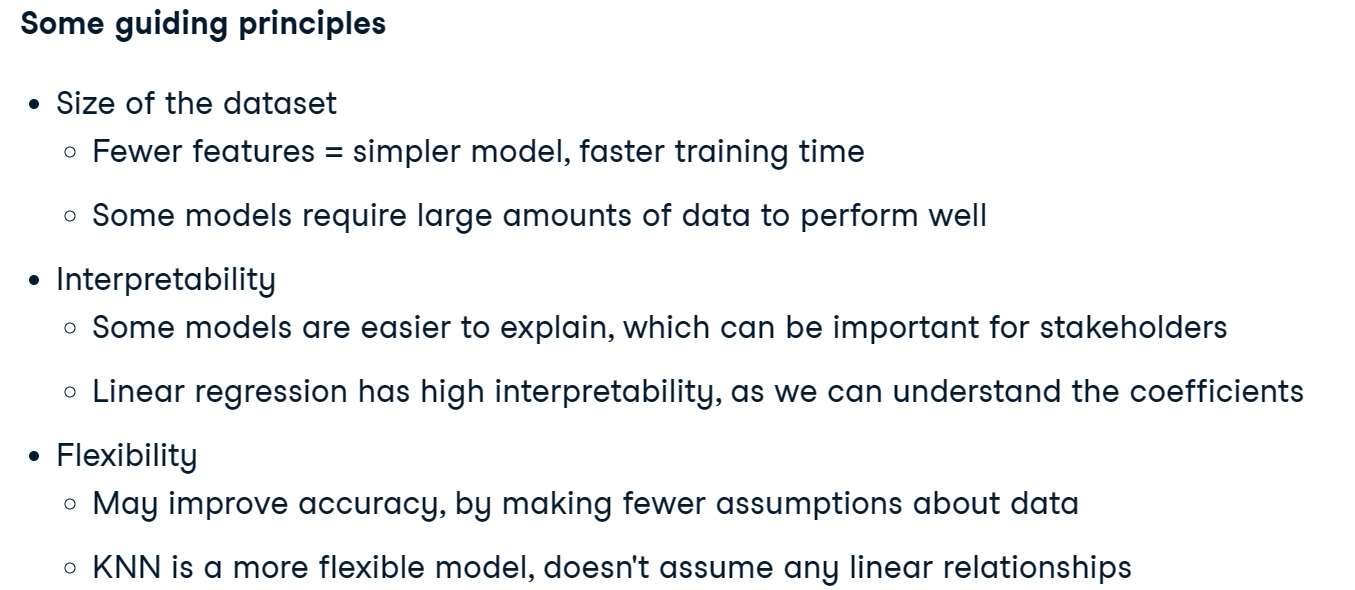
- scikit-learn allows the same methods to be used for most models for easy comparing
   - Regression model performance
     - RMSE
     - R-squared
   - Classification model performance
     - Accuracy
     - Confusion matrix
     - Precision, recall, F1-score
     - ROC AUC
- Approach
 - Train several models and evaluate performance out of the box
 - Then evaluate their performance without form of hyperparameter tuning
- Models affected by scaling: **Best to scale our data before evaluating models out of box.**
 - KNN
 - Linear Regression(plus Ridge, Lasso)
 - Logistic Regression
 - Artificial neural network 

In [205]:
# evaluating classification models
# evaluate three models for binary classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
# import modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [208]:
# split data 
X = diab.drop('Glucose', axis = 1).to_numpy()
y = diab['Glucose'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                   random_state = 42)

In [210]:
# scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

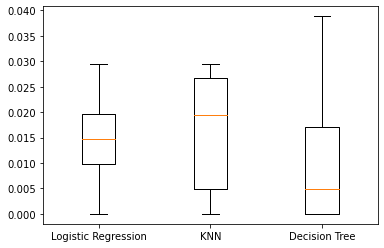

In [213]:
# create models into a dictionary
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier()}
results = []
for model in models.values():
    # instantiate a KFold object
    kf = KFold(n_splits = 6, random_state = 42, shuffle = True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv = kf)
    # by default, the scoring here will be accuracy
    results.append(cv_results)
plt.boxplot(results, labels = models.keys())
plt.show()
# orange line, median of cross-validation score

In [215]:
# test set performance
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print('{}Test Set Accurancy: {}'.format(name, test_score))

Logistic RegressionTest Set Accurancy: 0.006493506493506494
KNNTest Set Accurancy: 0.006493506493506494
Decision TreeTest Set Accurancy: 0.012987012987012988


>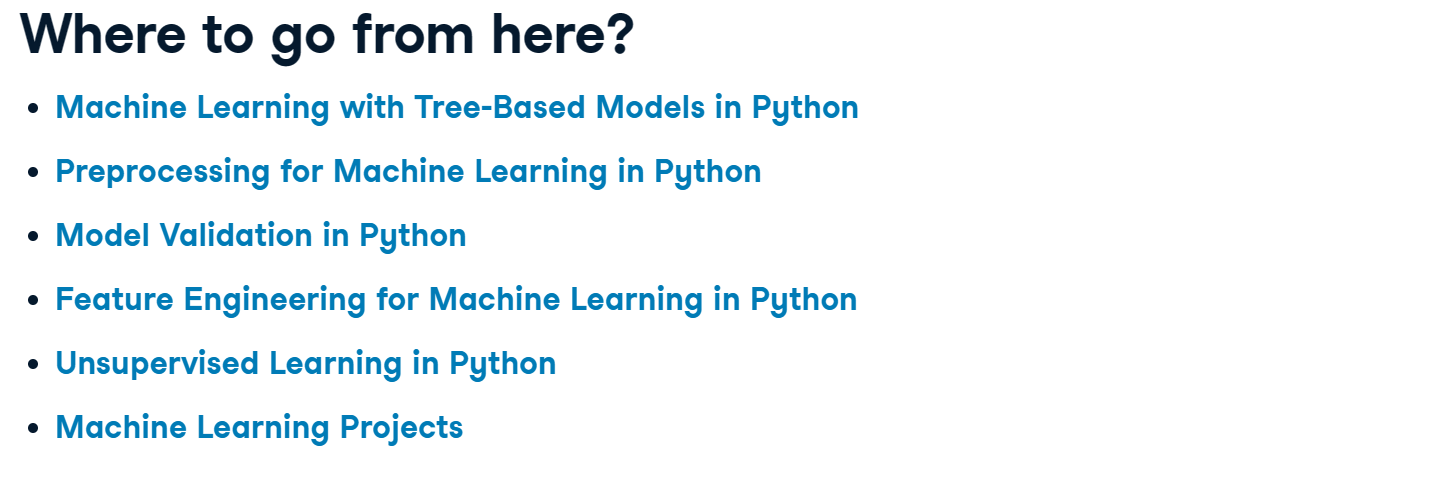